In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import optuna
import shap
import ast
import math
from scipy.stats import uniform, randint, loguniform
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression #linear model
from sklearn.neighbors import KNeighborsClassifier #classifiers
from sklearn.neighbors import KNeighborsRegressor #regressors
from sklearn.preprocessing import StandardScaler #normalization
from sklearn.preprocessing import MinMaxScaler #normalization
from sklearn.ensemble import IsolationForest #outlier removal
from sklearn.model_selection import train_test_split #hold-out method
from sklearn.model_selection import KFold #K-Fold method
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix #confusion matrix
from sklearn.metrics import roc_curve #ROC
from sklearn.metrics import auc #AUC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from statsmodels.graphics.mosaicplot import mosaic
from sklearn import svm
from scipy import stats
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
import miceforest as mf
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display, HTML
import re

# Data Understanding and Exploration

## Load the data

In [2]:
df_names = ["CEAS_08.csv","Enron.csv","Ling.csv","Nazario.csv","Nigerian_Fraud.csv","phishing_email.csv","SpamAssasin.csv"]
lst_of_dfs = []
for df_name in df_names:
    lst_of_dfs.append(pd.read_csv(df_name))


In [3]:
for i, df in enumerate(lst_of_dfs):
    display(HTML(f"<h2>DataFrame from {df_names[i]}</h2>"))
    display(df.head())

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1


,subject,body,label
0,"hpl nom for may 25 , 2001",( see attached file : hplno 525 . xls )\r\n- h...,0
1,re : nom / actual vols for 24 th,- - - - - - - - - - - - - - - - - - - - - - fo...,0
2,"enron actuals for march 30 - april 1 , 201","estimated actuals\r\nmarch 30 , 2001\r\nno flo...",0
3,"hpl nom for may 30 , 2001",( see attached file : hplno 530 . xls )\r\n- h...,0
4,"hpl nom for june 1 , 2001",( see attached file : hplno 601 . xls )\r\n- h...,0


,subject,body,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


,sender,receiver,date,subject,body,urls,label
0,Mail System Internal Data <MAILER-DAEMON@monke...,NaN,28 Sep 2017 09:57:25 -0400,DON'T DELETE THIS MESSAGE -- FOLDER INTERNAL DATA,This text is part of the internal format of yo...,1,1
1,cPanel <service@cpanel.com>,jose@monkey.org,"Fri, 30 Oct 2015 00:00:48 -0500",Verify Your Account,Business with \t\t\t\t\t\t\t\tcPanel & WHM \t...,1,1
2,Microsoft Outlook <recepcao@unimedceara.com.br>,NaN,"Fri, 30 Oct 2015 06:21:59 -0300 (BRT)",Helpdesk Mailbox Alert!!!,Your two incoming mails were placed on pending...,1,1
3,Ann Garcia <AnGarcia@mcoe.org>,"""info@maaaaa.org"" <info@maaaaa.org>","Fri, 30 Oct 2015 14:54:33 +0000",IT-Service Help Desk,Password will expire in 3 days. Click Here To ...,0,1
4,"""USAA"" <usaaacctupdate@sccu4u.com>",Recipients <usaaacctupdate@sccu4u.com>,"Fri, 30 Oct 2015 14:02:33 -0500",Final USAA Reminder - Update Your Account Now,"To ensure delivery to your inbox, please add U...",1,1


,sender,receiver,date,subject,body,urls,label
0,MR. JAMES NGOLA. <james_ngola2002@maktoob.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 02:38:20 +0000",URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-2...,0,1
1,Mr. Ben Suleman <bensul2004nng@spinfinder.com>,R@M,"Thu, 31 Oct 2002 05:10:00 -0000",URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend,\n\nI am Mr. Ben Suleman a custom ...",0,1
2,PRINCE OBONG ELEME <obong_715@epatra.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 22:17:55 +0100",GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,0,1
3,PRINCE OBONG ELEME <obong_715@epatra.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 22:44:20 -0000",GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,0,1
4,Maryam Abacha <m_abacha03@www.com>,R@M,"Fri, 01 Nov 2002 01:45:04 +0100",I Need Your Assistance.,"Dear sir, \n \nIt is with a heart full of hope...",0,1


,text_combined,label
0,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0
2,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,0


,sender,receiver,date,subject,body,label,urls
0,Robert Elz <kre@munnari.OZ.AU>,Chris Garrigues <cwg-dated-1030377287.06fa6d@D...,"Thu, 22 Aug 2002 18:26:25 +0700",Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -0500 ...",0,1
1,Steve Burt <Steve_Burt@cursor-system.com>,"""'zzzzteana@yahoogroups.com'"" <zzzzteana@yahoo...","Thu, 22 Aug 2002 12:46:18 +0100",[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Gre...",0,1
2,"""Tim Chapman"" <timc@2ubh.com>",zzzzteana <zzzzteana@yahoogroups.com>,"Thu, 22 Aug 2002 13:52:38 +0100",[zzzzteana] Moscow bomber,Man Threatens Explosion In Moscow \n\nThursday...,0,1
3,Monty Solomon <monty@roscom.com>,undisclosed-recipient: ;,"Thu, 22 Aug 2002 09:15:25 -0400",[IRR] Klez: The Virus That Won't Die,Klez: The Virus That Won't Die\n \nAlready the...,0,1
4,Stewart Smith <Stewart.Smith@ee.ed.ac.uk>,zzzzteana@yahoogroups.com,"Thu, 22 Aug 2002 14:38:22 +0100",Re: [zzzzteana] Nothing like mama used to make,"> in adding cream to spaghetti carbonara, whi...",0,1


In [4]:
for i,df in enumerate(lst_of_dfs):
    print(f"DF Name: {df_names[i]}, The shape is {df.shape}, Label dist is: \n{df.label.value_counts(normalize=True)} \n")

DF Name: CEAS_08.csv, The shape is (39154, 7), Label dist is: 
label
1    0.557848
0    0.442152
Name: proportion, dtype: float64 

DF Name: Enron.csv, The shape is (29767, 3), Label dist is: 
label
0    0.530487
1    0.469513
Name: proportion, dtype: float64 

DF Name: Ling.csv, The shape is (2859, 3), Label dist is: 
label
0    0.839804
1    0.160196
Name: proportion, dtype: float64 

DF Name: Nazario.csv, The shape is (1565, 7), Label dist is: 
label
1    1.0
Name: proportion, dtype: float64 

DF Name: Nigerian_Fraud.csv, The shape is (3332, 7), Label dist is: 
label
1    1.0
Name: proportion, dtype: float64 

DF Name: phishing_email.csv, The shape is (82486, 2), Label dist is: 
label
1    0.519979
0    0.480021
Name: proportion, dtype: float64 

DF Name: SpamAssasin.csv, The shape is (5809, 7), Label dist is: 
label
0    0.704252
1    0.295748
Name: proportion, dtype: float64 



### We can see that the df's CEAS_08, Enron, phishing_email, SpamAssasin and Ling consist of both True and False labels, and the Nazario and nigirian fraud are only True labels.

## Exploaration

In [5]:
def check_nulls(df):
  print("These columns contain NAN values:")
  print("-----------")
  total_cols = 0
  list_of_cols = []
  for col in df.columns:
    num_of_nulls = len(df) - df[col].count()
    if num_of_nulls > 0:
      list_of_cols.append(col)
      total_cols += 1
      print(f"The num of nulls in column {col} is: {num_of_nulls}")

  print("-----------")
  print(f"The total number of columns that contain NAN values is {total_cols}")
  return (list_of_cols)

for i,df in enumerate(lst_of_dfs):
    
    print(f"DF Name: {df_names[i]}")
    df_cols = check_nulls(df)
    print(f"\n\n\n***********************\n\n")


DF Name: CEAS_08.csv
These columns contain NAN values:
-----------
The num of nulls in column receiver is: 462
The num of nulls in column subject is: 28
-----------
The total number of columns that contain NAN values is 2



***********************


DF Name: Enron.csv
These columns contain NAN values:
-----------
The num of nulls in column subject is: 198
-----------
The total number of columns that contain NAN values is 1



***********************


DF Name: Ling.csv
These columns contain NAN values:
-----------
The num of nulls in column subject is: 62
-----------
The total number of columns that contain NAN values is 1



***********************


DF Name: Nazario.csv
These columns contain NAN values:
-----------
The num of nulls in column receiver is: 96
The num of nulls in column date is: 1
The num of nulls in column subject is: 4
-----------
The total number of columns that contain NAN values is 3



***********************


DF Name: Nigerian_Fraud.csv
These columns contain NA

In [6]:
lst_of_dfs[0]["sender"].head(30)

0                      Young Esposito <Young@iworld.de>
1                          Mok <ipline's1983@icable.ph>
2     Daily Top 10 <Karmandeep-opengevl@universalnet...
3                    Michael Parker <ivqrnai@pobox.com>
4     Gretchen Suggs <externalsep1@loanofficertool.com>
5     Caroline Aragon <dwthaidomainnamesm@thaidomain...
6       Replica Watches <jhorton@thebakercompanies.com>
7                Daily Top 10 <acidirev_1972@tcwpg.com>
8                     qydlqcws-iacfym@issues.apache.org
9         Daily Top 10 <orn|dent_1973@musicaedischi.it>
10      ambrosius edwin <370jcmiller@flychautauqua.com>
11           Alejandra Levy <rehearsings46@gametea.com>
12        Daily Top 10 <Atchuthan-erbatest@weijgers.nl>
13    Daily Top 10 <Scooter-obailat@picklesmaternity...
14                Alphonso Roach <exited@realskate.com>
15                           Racing <uqyrmo@sailing.ie>
16    Daily Top 10 <Joep-ntorions@picklesmaternity.com>
17    Daily Top 10 <Marci-ntelstok@picklesmatern

In [7]:
def extract_email_info(df, column_names):
    """
    Extracts sender/receiver information from specified columns in a DataFrame.
    Creates new columns with parsed data, prefixed by the column name, including country code.
    
    Parameters:
    - df: DataFrame to process.
    - column_names: List of column names to parse (e.g., ["sender", "receiver"]).
    
    Returns:
    - DataFrame with new parsed columns.
    """
    # Function to parse the email information
    def parse_email_info(email, col_prefix):
        # Check if the email is a string; otherwise, return None
        if not isinstance(email, str):
            return pd.Series({f'{col_prefix}_name': None, f'{col_prefix}_email': None})
        
        # Regex pattern to capture the name and email parts
        match = re.match(r'(?P<name>.+?)\s*<(?P<email>.+?)>|(?P<only_email>[^<>\s]+)', email.strip())
        if match:
            if match.group('only_email'):
                return pd.Series({f'{col_prefix}_name': None, f'{col_prefix}_email': match.group('only_email')})
            else:
                return pd.Series({f'{col_prefix}_name': match.group('name').strip(), f'{col_prefix}_email': match.group('email').strip()})
        return pd.Series({f'{col_prefix}_name': None, f'{col_prefix}_email': None})

    # Function to extract the country code
    def extract_country_code(domain):
        if domain and isinstance(domain, str):
            parts = domain.split('.')
            if len(parts) > 1 and parts[-1].isalpha() and len(parts[-1]) == 2:
                return parts[-1]
        return None

    # Loop through each column name
    for col in column_names:
        # Check if the column exists in the DataFrame
        if col in df.columns:
            # Apply parsing function to the DataFrame column
            parsed_info = df[col].apply(lambda x: parse_email_info(x, col))
            df = pd.concat([df, parsed_info], axis=1)
            
            # Extract domain from email and add it to the DataFrame with column-specific prefix
            df[f'{col}_email_domain'] = df[f'{col}_email'].apply(lambda x: x.split('@')[-1] if isinstance(x, str) else None)
            
            # Extract country code from domain
            df[f'{col}_email_country_code'] = df[f'{col}_email_domain'].apply(extract_country_code)
        else:
            print(f"Column '{col}' not found in DataFrame.")
    
    return df

In [8]:
df_with_info = extract_email_info(lst_of_dfs[0], ['sender', 'receiver'])

In [9]:
df_with_info

,sender,receiver,date,subject,body,label,urls,sender_name,sender_email,sender_email_domain,sender_email_country_code,receiver_name,receiver_email,receiver_email_domain,receiver_email_country_code
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1,Young Esposito,Young@iworld.de,iworld.de,de,None,user4@gvc.ceas-challenge.cc,gvc.ceas-challenge.cc,cc
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1,Mok,ipline's1983@icable.ph,icable.ph,ph,None,user2.2@gvc.ceas-challenge.cc,gvc.ceas-challenge.cc,cc
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1,Daily Top 10,Karmandeep-opengevl@universalnet.psi.br,universalnet.psi.br,br,None,user2.9@gvc.ceas-challenge.cc,gvc.ceas-challenge.cc,cc
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1,Michael Parker,ivqrnai@pobox.com,pobox.com,None,SpamAssassin Dev,xrh@spamassassin.apache.org,spamassassin.apache.org,None
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1,Gretchen Suggs,externalsep1@loanofficertool.com,loanofficertool.com,None,None,user2.2@gvc.ceas-challenge.cc,gvc.ceas-challenge.cc,cc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39149,CNN Alerts <charlene-detecton@btcmarketing.com>,email1007@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:34:50 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0,CNN Alerts,charlene-detecton@btcmarketing.com,btcmarketing.com,None,None,email1007@gvc.ceas-challenge.cc,gvc.ceas-challenge.cc,cc
39150,CNN Alerts <idgetily1971@careplusnj.org>,email104@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:35:11 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0,CNN Alerts,idgetily1971@careplusnj.org,careplusnj.org,None,None,email104@gvc.ceas-challenge.cc,gvc.ceas-challenge.cc,cc
39151,Abhijit Vyas <xpojhbz@gmail.com>,fxgmqwjn@triptracker.net,"Fri, 08 Aug 2008 22:00:43 +0800",Slideshow viewer,Hello there ! \nGreat work on the slide show v...,0,0,Abhijit Vyas,xpojhbz@gmail.com,gmail.com,None,None,fxgmqwjn@triptracker.net,triptracker.net,None
39152,Joseph Brennan <vupzesm@columbia.edu>,zqoqi@spamassassin.apache.org,"Fri, 08 Aug 2008 09:00:46 -0500",Note on 2-digit years,"\nMail from sender , coming from intuit.com\ns...",0,0,Joseph Brennan,vupzesm@columbia.edu,columbia.edu,None,None,zqoqi@spamassassin.apache.org,spamassassin.apache.org,None


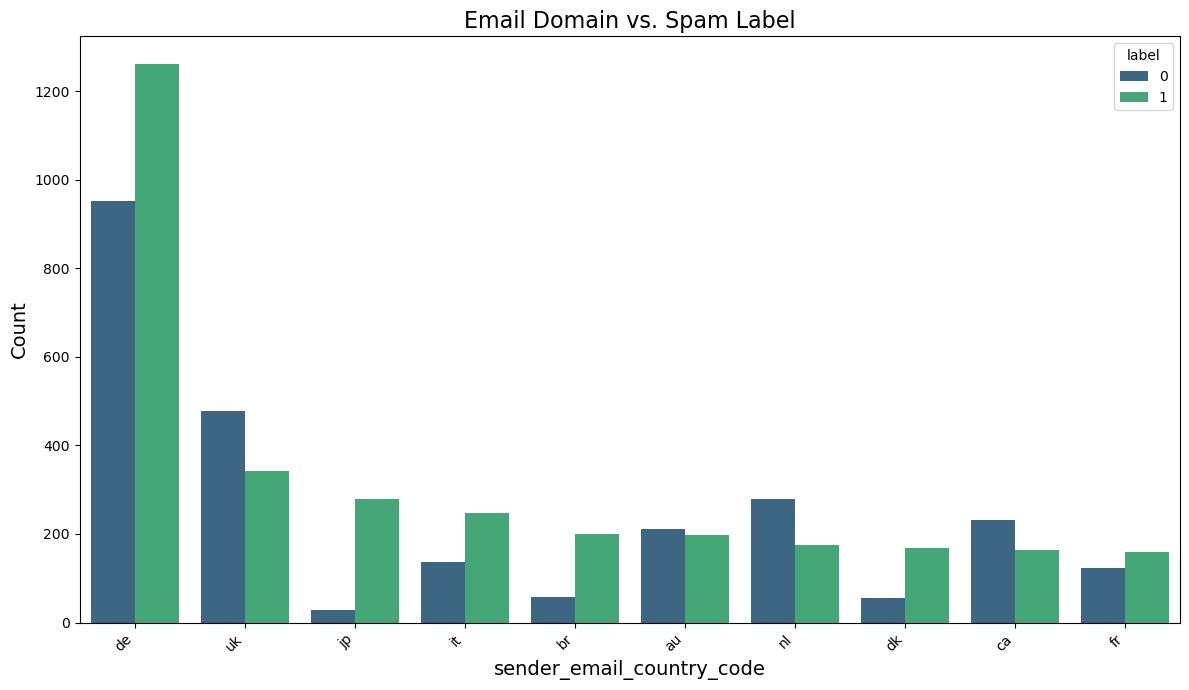

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_top_10_categorical_label_1(df, categorical_col, label_col, title="Top 10 Categories for Label 1"):
    """
    Plots a bar plot of the top 10 categories in a categorical column, based on the count of label 1, organized in descending order.

    Parameters:
    - df: DataFrame containing the data.
    - categorical_col: Name of the categorical column.
    - label_col: Name of the label column.
    - title: Title of the plot (optional).

    Returns:
    - Displays the plot.
    """
    # Check if columns exist in the DataFrame
    if categorical_col not in df.columns or label_col not in df.columns:
        raise ValueError(f"One or both columns '{categorical_col}' and '{label_col}' do not exist in the DataFrame.")
    
    # Filter the DataFrame to only include rows where label_col is 1
    df_label_1 = df[df[label_col] == 1]
    
    # Calculate the count of each category where label is 1
    top_categories = df_label_1[categorical_col].value_counts().nlargest(10).index

    # Filter the original DataFrame to include only the top categories
    df_top = df[df[categorical_col].isin(top_categories)]

    # Calculate the order for plotting
    order = df_top[df_top[label_col] == 1][categorical_col].value_counts().nlargest(10).index
    
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df_top, x=categorical_col, hue=label_col, palette='viridis', order=order)
    
    plt.title(title, fontsize=16)
    plt.xlabel(categorical_col, fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=label_col)
    plt.tight_layout()
    plt.show()

# Example usage
# plot_top_10_categorical_label_1(df_with_info, 'sender_email_domain', 'is_spam', title="Top 10 Email Domains with Spam")


plot_top_10_categorical_label_1(df_with_info, 'sender_email_country_code', 'label', title="Email Domain vs. Spam Label")


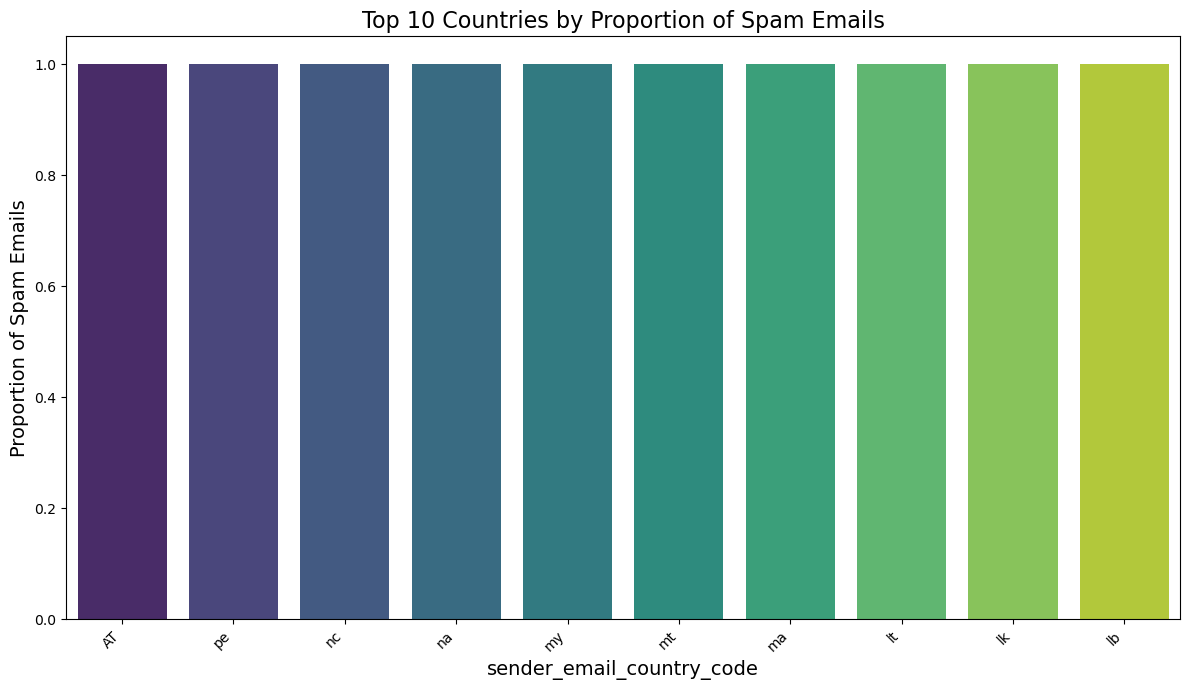

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_normalized_top_10_categorical_label_1(df, categorical_col, label_col, title="Top 10 Categories by Proportion of Spam Emails"):
    """
    Plots a bar plot of the top 10 categories in a categorical column based on the proportion of label 1,
    organized in descending order, normalized to show proportions.

    Parameters:
    - df: DataFrame containing the data.
    - categorical_col: Name of the categorical column.
    - label_col: Name of the label column.
    - title: Title of the plot (optional).

    Returns:
    - Displays the plot.
    """
    # Check if columns exist in the DataFrame
    if categorical_col not in df.columns or label_col not in df.columns:
        raise ValueError(f"One or both columns '{categorical_col}' and '{label_col}' do not exist in the DataFrame.")
    
    # Group by the categorical column and calculate the count of label 1 and total count
    grouped = df.groupby(categorical_col)[label_col].value_counts(normalize=True).unstack().fillna(0)
    
    # Sort by the proportion of label 1
    grouped = grouped.sort_values(by=1, ascending=False).head(10)

    # Plotting
    plt.figure(figsize=(12, 7))
    sns.barplot(x=grouped.index, y=grouped[1], palette='viridis')
    
    plt.title(title, fontsize=16)
    plt.xlabel(categorical_col, fontsize=14)
    plt.ylabel("Proportion of Spam Emails", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example usage
# Assuming 'sender_email_country_code' is the column for country codes
plot_normalized_top_10_categorical_label_1(df_with_info, 'sender_email_country_code', 'label', title="Top 10 Countries by Proportion of Spam Emails")


### Feature engineering - add a suspected_country_code column - threshold as a hyperparameter


In [26]:
import pandas as pd

def add_suspected_country_code_column(df, label_col='label', threshold=0.9):
    """
    Adds a column to the DataFrame indicating whether each email's country code
    is suspected of having more than 90% spam emails.

    Parameters:
    - df: DataFrame containing the data.
    - label_col: Name of the column indicating whether an email is spam (default is 'label').
    - threshold: Proportion threshold for determining suspected country codes (default is 0.9).

    Returns:
    - DataFrame with an additional column 'suspected_country_code' (1 if suspected, 0 otherwise).
    """
    # Calculate proportion of spam emails per country code
    spam_proportions = df.groupby('sender_email_country_code')[label_col].mean()

    # Flag country codes where more than 90% are spam
    df['suspected_country_code'] = df['sender_email_country_code'].map(
        lambda x: 1 if spam_proportions.get(x, 0) > threshold else 0
    )

    return df

# Example usage
df_with_suspected = add_suspected_country_code_column(df_with_info, label_col='label', threshold=0.7)
# print(df_with_suspected.head())  # Display the DataFrame with the added column


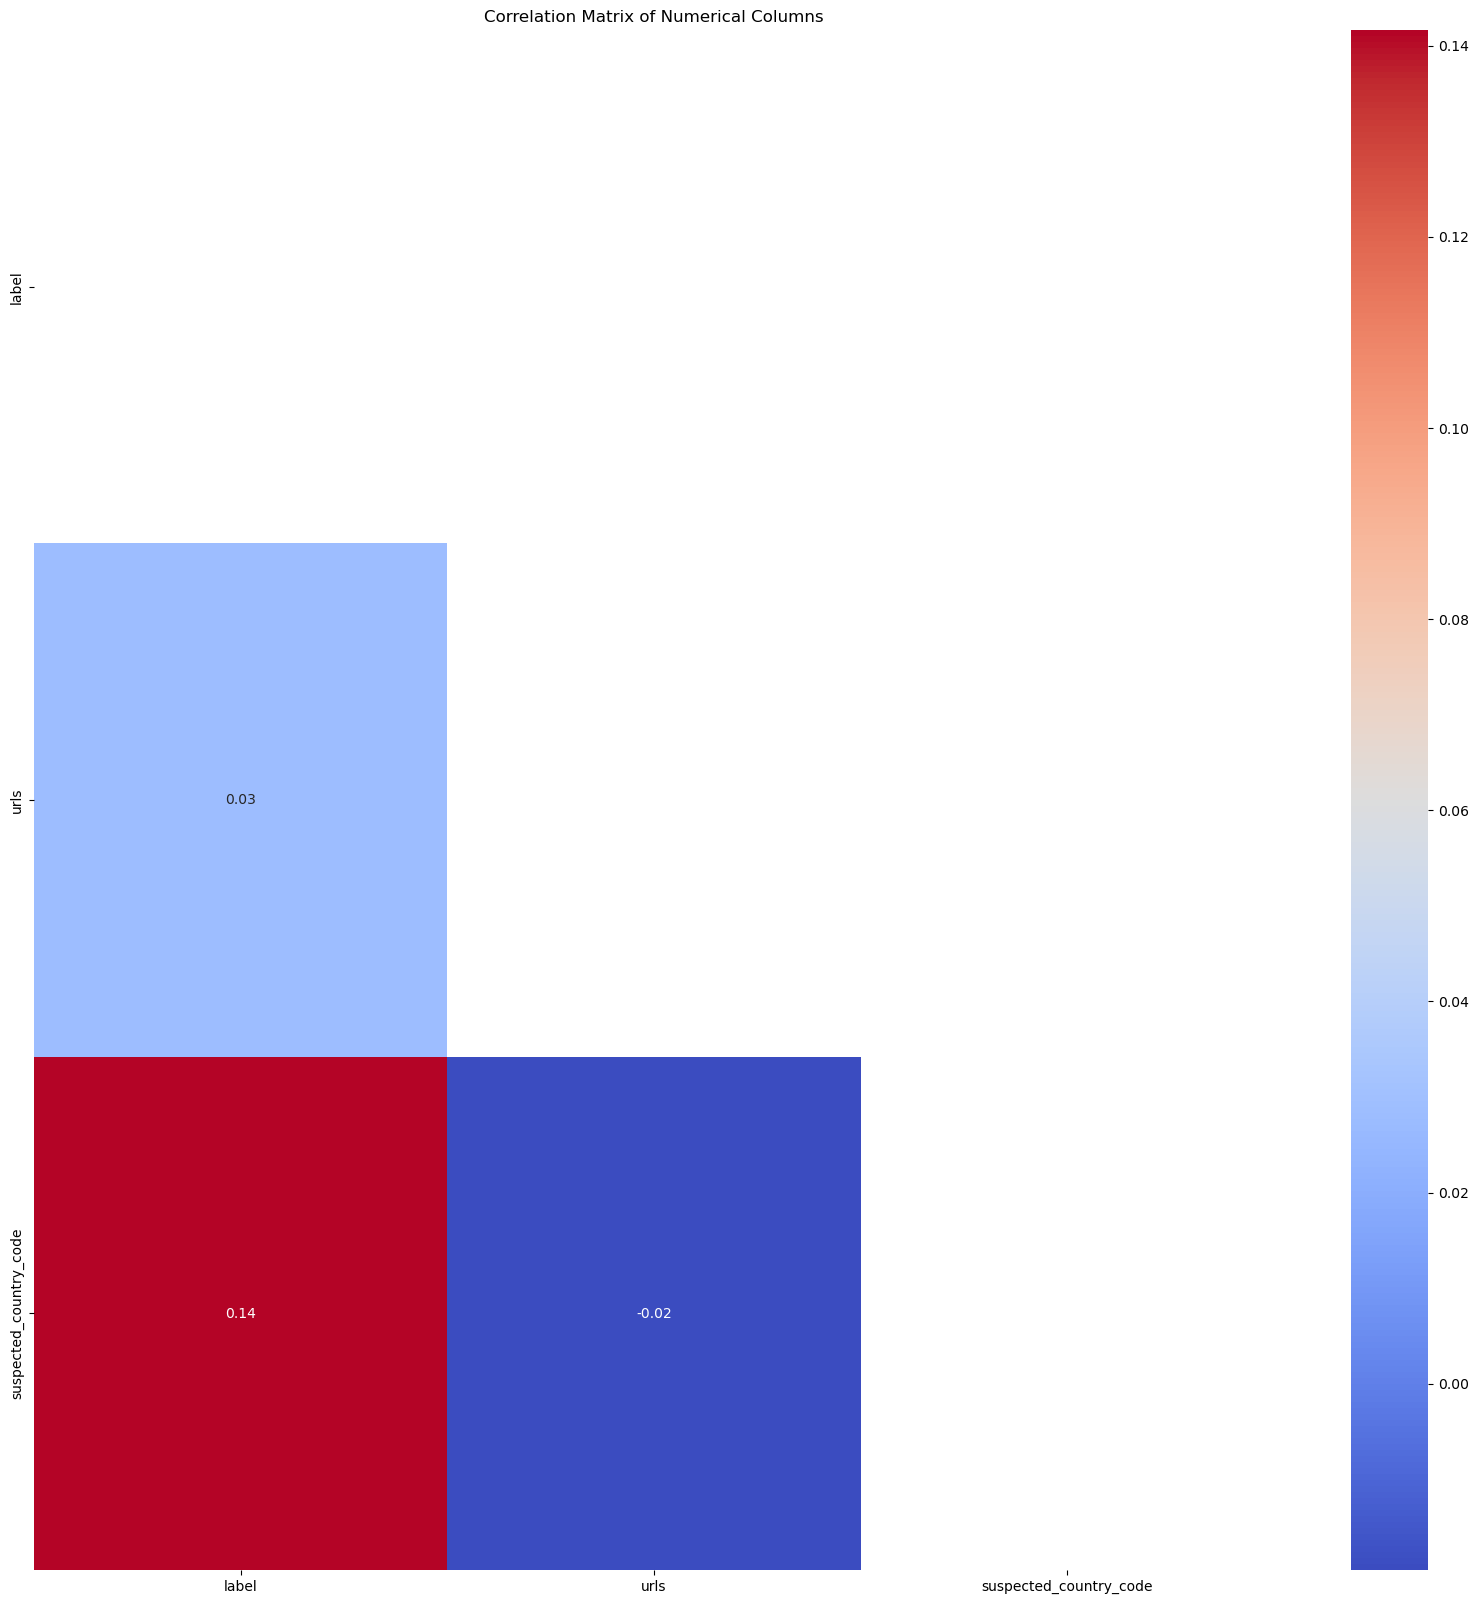

In [27]:
numerical_columns = df_with_suspected.select_dtypes(exclude=['object']).columns.tolist()
plt.figure(figsize=(20, 20))

# Create a correlation matrix for numerical columns
correlation_matrix = df_with_suspected[numerical_columns].corr()

# Mask the upper triangle for better readability
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# plot the heat map
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)

plt.title("Correlation Matrix of Numerical Columns")
plt.show()

In [28]:
import pandas as pd
import numpy as np

def maximize_correlation_with_threshold(df, label_col='label', max_threshold=1, step=0.01):
    """
    Maximizes the correlation between the label column and a new column (suspected_country_code)
    by optimizing over the threshold value.

    Parameters:
    - df: DataFrame containing the data.
    - label_col: Name of the column indicating whether an email is spam (default is 'label').
    - max_threshold: Maximum threshold value to test (default is 1).
    - step: Step size for testing threshold values (default is 0.01).

    Returns:
    - DataFrame with an additional column 'suspected_country_code' optimized for maximum correlation.
    - Optimal threshold value and corresponding maximum correlation coefficient.
    """
    best_threshold = 0
    max_correlation = -1
    
    # Iterate over different threshold values
    for threshold in np.arange(0, max_threshold + step, step):
        # Calculate proportion of spam emails per country code
        spam_proportions = df.groupby('sender_email_country_code')[label_col].mean()

        # Flag country codes where more than threshold are spam
        df['suspected_country_code'] = df['sender_email_country_code'].map(
            lambda x: 1 if spam_proportions.get(x, 0) > threshold else 0
        )
        
        # Calculate correlation between label and suspected_country_code
        correlation = df[label_col].corr(df['suspected_country_code'])

        # Update best correlation and threshold if found a higher correlation
        if correlation > max_correlation:
            max_correlation = correlation
            best_threshold = threshold
    
    # Apply the best threshold to add the new column
    spam_proportions = df.groupby('sender_email_country_code')[label_col].mean()
    df['suspected_country_code'] = df['sender_email_country_code'].map(
        lambda x: 1 if spam_proportions.get(x, 0) > best_threshold else 0
    )
    
    print(f"Optimal threshold: {best_threshold}")
    print(f"Maximum correlation coefficient: {max_correlation}")
    
    return df, best_threshold, max_correlation

# Example usage
df_with_optimized_column, optimal_threshold, max_corr = maximize_correlation_with_threshold(df_with_info, label_col='label')
# print(df_with_optimized_column.head())  # Display the DataFrame with the optimized column


Optimal threshold: 0.7000000000000001
Maximum correlation coefficient: 0.14161689767706945


In [29]:
df_with_optimized_column, optimal_threshold, max_corr

(                                                  sender  \
 0                       Young Esposito <Young@iworld.de>   
 1                           Mok <ipline's1983@icable.ph>   
 2      Daily Top 10 <Karmandeep-opengevl@universalnet...   
 3                     Michael Parker <ivqrnai@pobox.com>   
 4      Gretchen Suggs <externalsep1@loanofficertool.com>   
 ...                                                  ...   
 39149    CNN Alerts <charlene-detecton@btcmarketing.com>   
 39150           CNN Alerts <idgetily1971@careplusnj.org>   
 39151                   Abhijit Vyas <xpojhbz@gmail.com>   
 39152              Joseph Brennan <vupzesm@columbia.edu>   
 39153                Christian Heimes <wluhe@cheimes.de>   
 
                                              receiver  \
 0                         user4@gvc.ceas-challenge.cc   
 1                       user2.2@gvc.ceas-challenge.cc   
 2                       user2.9@gvc.ceas-challenge.cc   
 3      SpamAssassin Dev <xrh@spam